# TRABALHO PRÁTICO 1 – CLASSIFICAÇÃO DE LEUCEMIAS COM K‑NN E SELEÇÃO DE GENES

## CONTEXTO
O Gene Expression Dataset (Golub et al., 1999) contém perfis de expressão de 7.129 genes medidos em 72 amostras de leucemia – 47 ALL (linfoblástica) e 25 AML (mieloblástica). O estudo original mostrou que é possível prever o subtipo de câncer apenas pelos perfis de expressão.

### 1.1 Aquisição e inspeção

In [123]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df_train = pd.read_csv('./data_set_ALL_AML_train.csv')
df_actual = pd.read_csv('./actual.csv')
df_independent = pd.read_csv('./data_set_ALL_AML_independent.csv')

In [125]:
df_train.info()
df_actual.info()
df_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   int64 
 15  call.6               

É possível observar que não tem valores null

### Pré-processamento

In [126]:
colunas_call_para_remover_train = [col for col in df_train.columns if 'call' in col]
X_train = df_train.drop(columns=colunas_call_para_remover_train+["Gene Description", "Gene Accession Number"])
X_train = X_train[sorted(X_train.columns, key=lambda x: int(x))].transpose()

colunas_call_para_remover_independent = [col for col in df_independent.columns if 'call' in col]
X_test = df_independent.drop(columns=colunas_call_para_remover_independent+["Gene Description", "Gene Accession Number"])
X_test = X_test[sorted(X_test.columns, key=lambda x: int(x))].transpose()

In [127]:
y_train = df_actual.loc[X_train.index.astype(int)-1, 'cancer']
y_test = df_actual.loc[X_test.index.astype(int)-1, 'cancer']

### Normalização dos dados

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
k_values = [1, 3, 5, 7, 9]
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

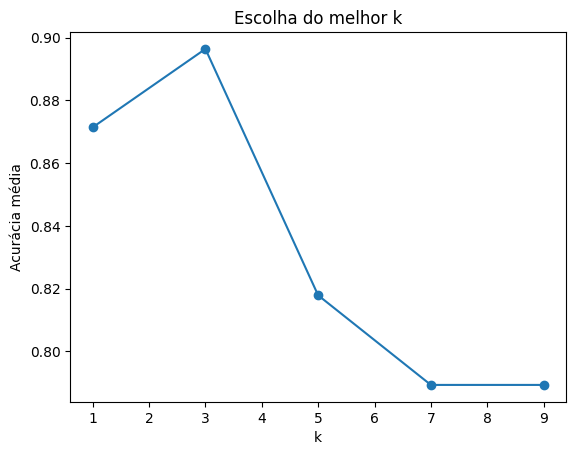

Melhor k: 3


In [130]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Acurácia média")
plt.title("Escolha do melhor k")
plt.show()

best_k = k_values[cv_scores.index(max(cv_scores))]
print("Melhor k:", best_k)

In [131]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
test_acc = best_knn.score(X_test_scaled, y_test)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
train_acc = best_knn.score(X_train_scaled, y_train)
print(f"Acurácia no conjunto de treinamento: {train_acc:.4f}")

Acurácia no conjunto de teste: 0.7059
Acurácia no conjunto de treinamento: 0.9211


### Seleção de características

In [ ]:
sfs = SequentialFeatureSelector(
    knn,
    n_features_to_select="auto",
    direction='forward',
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train_scaled, y_train)
selected_features = X_train.columns[sfs.get_support()]
print("Atributos selecionados:", list(selected_features))

KeyboardInterrupt: 